# Vorbereitung

# Stance Detection

Einleitungstext

# Datenvorbereitung (alle zusammen)

## XML Dateien parsen

In [351]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from xml.dom import minidom

directories = ['Wahlperiode19', 'Wahlperiode20']
final_list_for_df = []
dfs = []
for directory in directories: 
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            dom = minidom.parse(f)

            temp_dict = {
                'datum': dom.getElementsByTagName('datum')[0].getAttribute('date'),
                'tagesordnungspunkt': '',
                'thema': '',
                'partei': '',
                'rede': '',
            }

            inhaltsverzeichnis = dom.getElementsByTagName('inhaltsverzeichnis')[0]

            inhalte = inhaltsverzeichnis.getElementsByTagName('ivz-block')

            tagesordnungspunkte_mit_id = {}

            for tagesordnungspunkt in inhalte:
                i = 0
                vollständiger_tagesordnungspunkt = ''
                tagesordnungspunkt_inhalt = tagesordnungspunkt.getElementsByTagName('ivz-eintrag-inhalt')
                for _ in range(len(tagesordnungspunkt_inhalt)):
                    # Tagesordnungspunkte können aus mehreren Abschnitten; z.B. a) und b) bestehen die hier zu einem zusammengefasst werden
                    if tagesordnungspunkt_inhalt[i].firstChild.nodeValue:
                        teil_tagesordnungspunkt = tagesordnungspunkt_inhalt[i].firstChild.nodeValue
                        teil_tagesordnungspunkt.lstrip()
                        teil_tagesordnungspunkt.rstrip()
                        vollständiger_tagesordnungspunkt += ' ' + teil_tagesordnungspunkt
                        
                    i += 1
                tagesordnungspunkte_mit_id[tagesordnungspunkt.getElementsByTagName('ivz-block-titel')[0].firstChild.nodeValue[:-1]] = vollständiger_tagesordnungspunkt

            alle_tagesordnungspunkte = dom.getElementsByTagName('tagesordnungspunkt')

            for tagesordnungspunkt in alle_tagesordnungspunkte:
                tagesordnungspunkt_id = tagesordnungspunkt.getAttribute('top-id')
                temp_dict['tagesordnungspunkt'] = tagesordnungspunkt_id
                try:
                    temp_dict['thema'] = tagesordnungspunkte_mit_id[tagesordnungspunkt_id]
                except:
                    if tagesordnungspunkt_id[:11] == 'Zusatzpunkt':
                        # im Inhaltsverzeichnis aus dem das Dictionary kommt steht "Zusatztagesordnungspunkt";
                        # IDs werden jedoch nur mit "Zusatzpunkt" benannt
                        tagesordnungspunkt_id = tagesordnungspunkt_id.replace('Zusatzpunkt', 'Zusatztagesordnungspunkt')
                        try:
                            # Manchmal sind top-ids falsch formatiert; z.B. falsche Aggregation "Zusatzpunkt 11, 12"
                            # Diese werden hier einfach übersprungen
                            temp_dict['thema'] = tagesordnungspunkte_mit_id[tagesordnungspunkt_id]
                        except:
                            temp_dict['thema'] = 'n/a'
                    else:
                        temp_dict['thema'] = 'n/a'

                reden = tagesordnungspunkt.getElementsByTagName('rede')
                for rede in reden:
                    try:
                        temp_dict['partei'] = rede.getElementsByTagName('fraktion')[0].firstChild.nodeValue
                    except:
                        try:
                            temp_dict['partei'] = rede.getElementsByTagName('rolle_kurz')[0].firstChild.nodeValue
                        except:
                            temp_dict['partei'] = 'n/a'
                    volle_rede = ''
                    for paragraph in rede.getElementsByTagName('p'):
                        try:
                            if paragraph.firstChild.nodeValue:
                                teil_rede = paragraph.firstChild.nodeValue
                                teil_rede.lstrip()
                                teil_rede.rstrip()
                                volle_rede += ' ' + teil_rede
                               
                        except:
                            pass
                    temp_dict['rede'] = volle_rede
                    final_list_for_df.append(temp_dict.copy())
            dfs.append(pd.DataFrame(final_list_for_df))
            final_list_for_df = []

full_df = pd.concat(dfs, ignore_index=True)

full_df.rede = full_df.rede.str.lstrip()
full_df.rede = full_df.rede.str.rstrip()

full_df.thema = full_df.thema.str.lstrip()
full_df.thema = full_df.thema.str.rstrip()

full_df.to_csv("Bundestagsdaten.csv", sep=';')

full_df

,datum,tagesordnungspunkt,thema,partei,rede
0,15.01.2020,Tagesordnungspunkt 1,Befragung der Bundesregierung,Bundesminister BMAS,Sehr geehrter Herr Präsident! Liebe Kolleginne...
1,15.01.2020,Tagesordnungspunkt 1,Befragung der Bundesregierung,AfD,"Herr Minister, danke für die Neujahrswünsche. ..."
2,15.01.2020,Tagesordnungspunkt 1,Befragung der Bundesregierung,Bundesminister BMAS,Vielen Dank für Ihre Frage. – Sehr geehrter He...
3,15.01.2020,Tagesordnungspunkt 1,Befragung der Bundesregierung,AfD,"Herr Minister, völlig überraschend haben Sie d..."
4,15.01.2020,Tagesordnungspunkt 1,Befragung der Bundesregierung,Bundesminister BMAS,"Die Position der Bundesregierung ist die, die ..."
...,...,...,...,...,...
29691,02.06.2022,Einzelplan 30,n/a,SPD,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...
29692,02.06.2022,Einzelplan 30,n/a,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...
29693,02.06.2022,Einzelplan 30,n/a,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...
29694,02.06.2022,Einzelplan 30,n/a,SPD,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...


## Zwischenstand

In [352]:
next_df = full_df.partei.value_counts()
fig = plt.plot()
plt.pie(
    next_df.head(7), 
    autopct='%1.1f%%', 
    colors=['black', 'orangered','darkblue','yellow','darkred','green', 'green'], 
    textprops={'color':"w"}
)
plt.legend(next_df.head(7).index, bbox_to_anchor =(1.1, 0.75))

plt.show()

## Manuell kategorisiertes und bereinigtes Datenset

In [353]:
bereinigte_daten_df = pd.read_csv("Bundestagsdaten_mit_Kategorie.csv", sep=";")
bereinigte_daten_df

,tagesordnungspunkt,partei,rede,kategorie,datum,thema
0,Tagesordnungspunkt 13,AFD,Sehr geehrte Frau Präsidentin! Sehr geehrte Ko...,Beteiligung bewaffneter Streitkräfte,21032019,– Beschlussempfehlung und Bericht des Auswärti...
1,Tagesordnungspunkt 13,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Meine Damen und Herren! In D...,Beteiligung bewaffneter Streitkräfte,21032019,– Beschlussempfehlung und Bericht des Auswärti...
2,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,21032019,– Beschlussempfehlung und Bericht des Auswärti...
3,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,21032019,– Beschlussempfehlung und Bericht des Auswärti...
4,Tagesordnungspunkt 13,DIE LINKE,Frau Präsidentin! Meine Damen und Herren! Die ...,Beteiligung bewaffneter Streitkräfte,21032019,– Beschlussempfehlung und Bericht des Auswärti...
...,...,...,...,...,...,...
25923,Tagesordnungspunkt 32,SPD,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Menschenrechte,26112020,a) Zweite und dritte Beratung des von den Abge...
25924,Tagesordnungspunkt 32,SPD,"Herr Präsident, ich nehme die Wahl an, und ich...",Menschenrechte,26112020,a) Zweite und dritte Beratung des von den Abge...
25925,Tagesordnungspunkt 3,SPD,"Sehr geehrter Herr Alterspräsident, die SPD-Bu...",Sonstiges,26102021,Wahl der Präsidentin/des Präsidenten verbunden...
25926,Tagesordnungspunkt 3,SPD,"Herr Alterspräsident, vielen Dank. Ich nehme d...",Sonstiges,26102021,Wahl der Präsidentin/des Präsidenten verbunden...


In [354]:
bereinigte_daten_df['datum'] = pd.to_datetime(bereinigte_daten_df['datum'], format="%d%m%Y")
bereinigte_daten_df

,tagesordnungspunkt,partei,rede,kategorie,datum,thema
0,Tagesordnungspunkt 13,AFD,Sehr geehrte Frau Präsidentin! Sehr geehrte Ko...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
1,Tagesordnungspunkt 13,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Meine Damen und Herren! In D...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
2,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
3,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
4,Tagesordnungspunkt 13,DIE LINKE,Frau Präsidentin! Meine Damen und Herren! Die ...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
...,...,...,...,...,...,...
25923,Tagesordnungspunkt 32,SPD,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Menschenrechte,2020-11-26,a) Zweite und dritte Beratung des von den Abge...
25924,Tagesordnungspunkt 32,SPD,"Herr Präsident, ich nehme die Wahl an, und ich...",Menschenrechte,2020-11-26,a) Zweite und dritte Beratung des von den Abge...
25925,Tagesordnungspunkt 3,SPD,"Sehr geehrter Herr Alterspräsident, die SPD-Bu...",Sonstiges,2021-10-26,Wahl der Präsidentin/des Präsidenten verbunden...
25926,Tagesordnungspunkt 3,SPD,"Herr Alterspräsident, vielen Dank. Ich nehme d...",Sonstiges,2021-10-26,Wahl der Präsidentin/des Präsidenten verbunden...


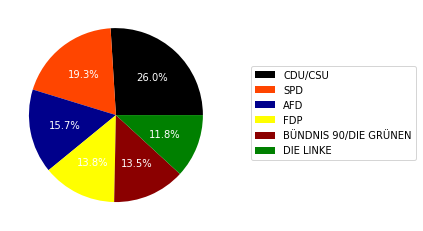

In [432]:
next_df = bereinigte_daten_df.partei.value_counts()
fig = plt.plot()
plt.pie(
    next_df.head(7), 
    autopct='%1.1f%%', 
    colors=['black', 'orangered','darkblue','yellow','darkred','green', 'green'], 
    textprops={'color':"w"}
)
plt.legend(next_df.head(7).index, bbox_to_anchor =(1.1, 0.75))

plt.show()

# Forschungsfrage 1

# Amilan Paramalingam

### Forschungsfrage 1: Veränderte Positionen der Parteien - Hat der Status einer Partei (Oppositon oder Regierung) Einfluss auf deren Positionen zu bestimmten Themen?

### Themenwahl
- Klimaschutz
- Russland

In [2]:
#imports 
import pandas as pd
from deep_translator import GoogleTranslator
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/datalore/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
df = pd.read_csv("Bundestagsdaten_mit_Kategorie.csv", sep=";")
df['datum'] = pd.to_datetime(df['datum'], format="%d%m%Y")
df

,tagesordnungspunkt,partei,rede,kategorie,datum,thema
0,Tagesordnungspunkt 13,AFD,Sehr geehrte Frau Präsidentin! Sehr geehrte Ko...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
1,Tagesordnungspunkt 13,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Meine Damen und Herren! In D...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
2,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
3,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
4,Tagesordnungspunkt 13,DIE LINKE,Frau Präsidentin! Meine Damen und Herren! Die ...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
...,...,...,...,...,...,...
25923,Tagesordnungspunkt 32,SPD,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Menschenrechte,2020-11-26,a) Zweite und dritte Beratung des von den Abge...
25924,Tagesordnungspunkt 32,SPD,"Herr Präsident, ich nehme die Wahl an, und ich...",Menschenrechte,2020-11-26,a) Zweite und dritte Beratung des von den Abge...
25925,Tagesordnungspunkt 3,SPD,"Sehr geehrter Herr Alterspräsident, die SPD-Bu...",Sonstiges,2021-10-26,Wahl der Präsidentin/des Präsidenten verbunden...
25926,Tagesordnungspunkt 3,SPD,"Herr Alterspräsident, vielen Dank. Ich nehme d...",Sonstiges,2021-10-26,Wahl der Präsidentin/des Präsidenten verbunden...


# Thema: Klimaschutz

In [4]:
# filter data set to categories specific to Klimaschutz for all parties
df_klima = df.loc[df.kategorie.apply(lambda cat: 'Klimaschutz' in cat)]
df_klima

,tagesordnungspunkt,partei,rede,kategorie,datum,thema
539,Zusatzpunkt 14,AFD,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...
540,Zusatzpunkt 14,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...
541,Zusatzpunkt 14,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...
542,Zusatzpunkt 14,DIE LINKE,Sehr geehrte Frau Präsidentin! Kolleginnen und...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...
543,Zusatzpunkt 14,FDP,Sehr geehrte Frau Präsidentin! Geschätzte Koll...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...
...,...,...,...,...,...,...
25283,Tagesordnungspunkt 23,CDU/CSU,Vielen Dank. – Frau Präsidentin! Liebe Kollegi...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...
25284,Tagesordnungspunkt 23,CDU/CSU,Frau Präsidentin! Meine Damen und Herren! Es i...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...
25285,Tagesordnungspunkt 23,DIE LINKE,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...
25286,Tagesordnungspunkt 23,FDP,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...


# Sentiment-Analyse mit TextBlob

In [5]:

# adding polarity value to dataframe for each speech


from textblob_de import TextBlobDE as TextBlob
import matplotlib.pyplot as plt
from pandarallel import pandarallel  # parallelization
pandarallel.initialize()

def get_polarity(input_speech):
    speech = TextBlob(input_speech)
    return speech.sentiment.polarity

# returns dataframe for category Klimaschutz with new column 'polarity_textblob'
df_klima["polarity_textblob"] = df_klima.parallel_apply(lambda row: get_polarity(row["rede"]), axis=1)
df_klima

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


<ipython-input-5-63e687c8213d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_klima["polarity_textblob"] = df_klima.parallel_apply(lambda row: get_polarity(row["rede"]), axis=1)


,tagesordnungspunkt,partei,rede,kategorie,datum,thema,polarity_textblob
539,Zusatzpunkt 14,AFD,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,0.188889
540,Zusatzpunkt 14,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,0.160417
541,Zusatzpunkt 14,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,0.246316
542,Zusatzpunkt 14,DIE LINKE,Sehr geehrte Frau Präsidentin! Kolleginnen und...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,-0.034211
543,Zusatzpunkt 14,FDP,Sehr geehrte Frau Präsidentin! Geschätzte Koll...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,0.265625
...,...,...,...,...,...,...,...
25283,Tagesordnungspunkt 23,CDU/CSU,Vielen Dank. – Frau Präsidentin! Liebe Kollegi...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...,0.110500
25284,Tagesordnungspunkt 23,CDU/CSU,Frau Präsidentin! Meine Damen und Herren! Es i...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...,0.234314
25285,Tagesordnungspunkt 23,DIE LINKE,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...,0.126786
25286,Tagesordnungspunkt 23,FDP,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...,0.151351


## 1 . Positionierung nicht-regierender Parteien zum Thema 'Klimaschutz' (Wahlperiode 19)

Nicht-regierende Parteien WP19:
- AFD
- Die Linke
- FDP
- Bündnis90/DieGrünen

regierede Pateien WP19:
- CDU/CSU
- SDP

In [359]:
#filter by date for 'Wahlperiode 19' (speeches held before 26. Oktober 2021)

df_klima_wp19 = df_klima.loc[df_klima.datum.apply(lambda date: date < pd.to_datetime('2021-10-26'))]
df_klima_wp19

,tagesordnungspunkt,partei,rede,kategorie,datum,thema,polarity_textblob
832,Tagesordnungspunkt 25,AFD,Herr Präsident! Sehr geehrte Kollegen! Es gibt...,Klimaschutz,2019-11-15,a) – Zweite und dritte Beratung des von den Fr...,-0.069298
833,Tagesordnungspunkt 25,AFD,Werter Herr Präsident! Werte Kolleginnen und K...,Klimaschutz,2019-11-15,a) – Zweite und dritte Beratung des von den Fr...,0.016369
834,Tagesordnungspunkt 25,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Klimaschutz,2019-11-15,a) – Zweite und dritte Beratung des von den Fr...,0.039828
835,Tagesordnungspunkt 25,BÜNDNIS 90/DIE GRÜNEN,Herr Präsident! Liebe Kolleginnen und Kollegen...,Klimaschutz,2019-11-15,a) – Zweite und dritte Beratung des von den Fr...,0.140230
836,Tagesordnungspunkt 25,CDU/CSU,Sehr geehrter Herr Präsident! Meine Damen! Mei...,Klimaschutz,2019-11-15,a) – Zweite und dritte Beratung des von den Fr...,0.251515
...,...,...,...,...,...,...,...
25283,Tagesordnungspunkt 23,CDU/CSU,Vielen Dank. – Frau Präsidentin! Liebe Kollegi...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...,0.110500
25284,Tagesordnungspunkt 23,CDU/CSU,Frau Präsidentin! Meine Damen und Herren! Es i...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...,0.234314
25285,Tagesordnungspunkt 23,DIE LINKE,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...,0.126786
25286,Tagesordnungspunkt 23,FDP,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Klimaschutz,2020-05-14,Zweite und dritte Beratung des von den Fraktio...,0.151351


In [360]:
#values y scale for plot
ymin = -0.50
ymax = 0.50

## AFD

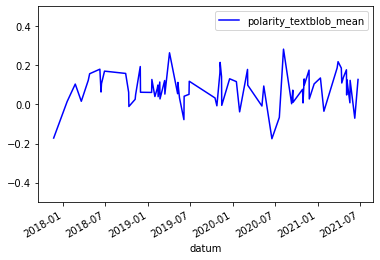

In [361]:
# dataframe for AFD for wp19 for category klimaschutz
df_klima_wp19_afd = df_klima_wp19.loc[df_klima_wp19.partei.apply(lambda par: 'AFD' in par)]


# get mean value of polarity score of all speakers of same party per date
df_klima_wp19_grouped_afd = df_klima_wp19_afd.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp19_grouped_afd = df_klima_wp19_grouped_afd.add_suffix('_mean').reset_index()

# plot the mean values for wp19
df_klima_wp19_grouped_afd.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='blue')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## Die Linke

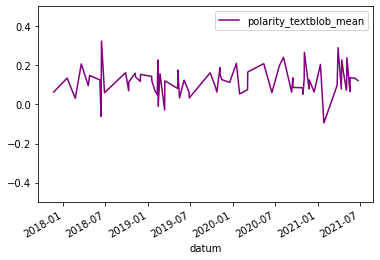

In [362]:
# dataframe for die Linke for wp19 for category klimaschutz
df_klima_wp19_linke = df_klima_wp19.loc[df_klima_wp19.partei.apply(lambda par: 'DIE LINKE' in par)]

# mean value of polarity score per date for party 
df_klima_wp19_grouped_linke = df_klima_wp19_linke.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp19_grouped_linke = df_klima_wp19_grouped_linke.add_suffix('_mean').reset_index()

# plot the mean values for wp19
df_klima_wp19_grouped_linke.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='purple')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## FDP

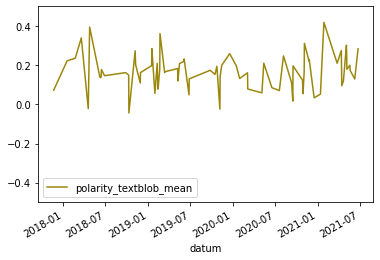

In [363]:
# dataframe for FDP for wp19 for category klimaschutz
df_klima_wp19_fdp = df_klima_wp19.loc[df_klima_wp19.partei.apply(lambda par: 'FDP' in par)]

# mean value of polarity score per date for party 
df_klima_wp19_grouped_fdp = df_klima_wp19_fdp.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp19_grouped_fdp = df_klima_wp19_grouped_fdp.add_suffix('_mean').reset_index()

# plot the mean values for wp19
df_klima_wp19_grouped_fdp.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='#9b870c')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## BÜNDNIS 90/DIE GRÜNEN

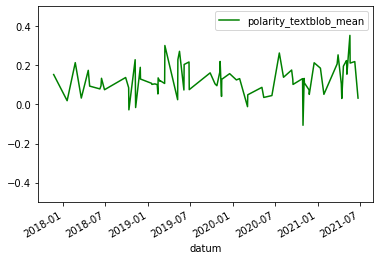

In [364]:
# dataframe for BÜNDNIS 90/DIE GRÜNEN for wp19 for category klimaschutz
df_klima_wp19_gruene = df_klima_wp19.loc[df_klima_wp19.partei.apply(lambda par: 'BÜNDNIS 90/DIE GRÜNEN' in par)]

# mean value of polarity score per date for party 
df_klima_wp19_grouped_gruene = df_klima_wp19_gruene.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp19_grouped_gruene = df_klima_wp19_grouped_gruene.add_suffix('_mean').reset_index()

# plot the mean values for wp19
df_klima_wp19_grouped_gruene.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='green')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## 2. Positionierung regierender Parteien beim Thema Klimaschutz (Wahlperiode 19)

## SPD

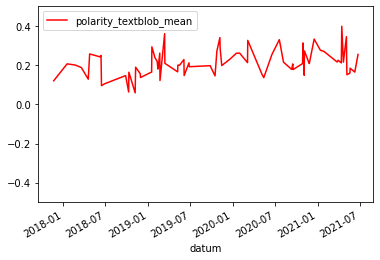

In [365]:
# dataframe for SPD for wp19 for category klimaschutz
df_klima_wp19_SPD = df_klima_wp19.loc[df_klima_wp19.partei.apply(lambda par: 'SPD' in par)]

# mean value of polarity score per date for party 
df_klima_wp19_grouped_SPD = df_klima_wp19_SPD.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp19_grouped_SPD = df_klima_wp19_grouped_SPD.add_suffix('_mean').reset_index()

# plot the mean values for wp19
df_klima_wp19_grouped_SPD.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='red')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## CDU/CSU

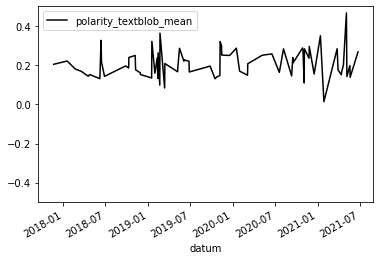

In [366]:
# dataframe for CDU/CSU for wp19 for category klimaschutz
df_klima_wp19_CDU_CSU = df_klima_wp19.loc[df_klima_wp19.partei.apply(lambda par: 'CDU/CSU' in par)]


# mean value of polarity score per date for party 
df_klima_wp19_grouped_CDU_CSU = df_klima_wp19_CDU_CSU.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp19_grouped_CDU_CSU = df_klima_wp19_grouped_CDU_CSU.add_suffix('_mean').reset_index()

# plot the mean values for wp19
df_klima_wp19_grouped_CDU_CSU.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='black')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## 3. Positionierung der nicht regierenden Parteien beim Thema Klimaschutz (Wahlperiode 20)

nich-regierende Parteien WP20
- AFD
- Die Linke
- CDU/CSU
  
regierende Pateien WP20
- SPD
- Bündnis90/Grüne
- FDP

In [17]:
#filter date for 'Wahlperiode 20' which are speeches after 26. Oktober 2021

df_klima_wp20 = df_klima.loc[df_klima.datum.apply(lambda date: date >= pd.to_datetime('2021-10-26'))]

df_klima_wp20

,tagesordnungspunkt,partei,rede,kategorie,datum,thema,polarity_textblob
539,Zusatzpunkt 14,AFD,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,0.188889
540,Zusatzpunkt 14,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,0.160417
541,Zusatzpunkt 14,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,0.246316
542,Zusatzpunkt 14,DIE LINKE,Sehr geehrte Frau Präsidentin! Kolleginnen und...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,-0.034211
543,Zusatzpunkt 14,FDP,Sehr geehrte Frau Präsidentin! Geschätzte Koll...,Klimaschutz,2022-06-24,– Zweite und dritte Beratung des von der Bunde...,0.265625
...,...,...,...,...,...,...,...
19205,Zusatzpunkt 10,SPD,Sehr geehrte Frau Präsidentin! Meine Damen und...,Klimaschutz,2022-06-24,"Erste Beratung des von den Fraktionen SPD, BÜN...",0.266228
19206,Zusatzpunkt 10,SPD,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Klimaschutz,2022-06-24,"Erste Beratung des von den Fraktionen SPD, BÜN...",0.245455
20042,Tagesordnungspunkt 24,AFD,Sehr geehrte Frau Präsidentin! Kolleginnen und...,Klimaschutz,2022-05-12,Erste Beratung des von der Bundesregierung ein...,0.151667
20043,Tagesordnungspunkt 24,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Klimaschutz,2022-05-12,Erste Beratung des von der Bundesregierung ein...,0.083108


## AFD

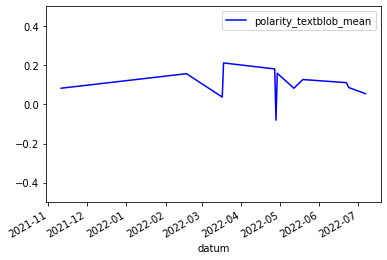

In [368]:
# dataframe for afd for wp20 for category klimaschutz
df_klima_wp20_afd = df_klima_wp20.loc[df_klima_wp20.partei.apply(lambda par: 'AFD' in par)]

# mean value of polarity score per date for party 
df_klima_wp20_grouped_afd = df_klima_wp20_afd.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp20_grouped_afd = df_klima_wp20_grouped_afd.add_suffix('_mean').reset_index()

# plot
df_klima_wp20_grouped_afd.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='blue')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## Die Linke

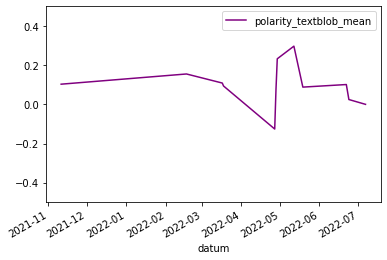

,datum,partei,polarity_textblob_mean
0,2021-11-11,DIE LINKE,0.102966
1,2022-02-17,DIE LINKE,0.155060
2,2022-03-17,DIE LINKE,0.108772
3,2022-03-18,DIE LINKE,0.093627
4,2022-04-27,DIE LINKE,-0.126000
5,2022-04-28,DIE LINKE,0.076786
6,2022-04-29,DIE LINKE,0.232593
7,2022-05-12,DIE LINKE,0.297094
8,2022-05-19,DIE LINKE,0.088000
9,2022-06-22,DIE LINKE,0.101149


In [18]:
# dataframe for die Linke for wp20 for category klimaschutz
df_klima_wp20_linke = df_klima_wp20.loc[df_klima_wp20.partei.apply(lambda par: 'DIE LINKE' in par)]

# mean value of polarity score per date for party 
df_klima_wp20_grouped_linke = df_klima_wp20_linke.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp20_grouped_linke = df_klima_wp20_grouped_linke.add_suffix('_mean').reset_index()

df_klima_wp20_grouped_linke.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='purple')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()
df_klima_wp20_grouped_linke

## CDU/CSU

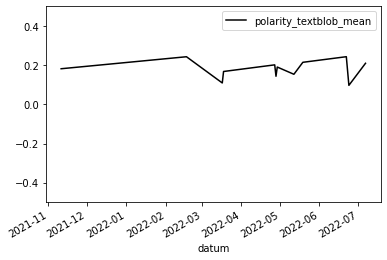

In [370]:
# dataframe for CDU/CSU for wp19 for category klimaschutz
df_klima_wp20_CDU_CSU = df_klima_wp20.loc[df_klima_wp20.partei.apply(lambda par: 'CDU/CSU' in par)]

# mean value of polarity score per date for party 
df_klima_wp20_grouped_CDU_CSU = df_klima_wp20_CDU_CSU.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp20_grouped_CDU_CSU = df_klima_wp20_grouped_CDU_CSU.add_suffix('_mean').reset_index()

df_klima_wp20_grouped_CDU_CSU.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='black')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## 4. Positionierung der regierenden Parteien beim Thema Klimaschutz (Wahlperiode 20)

## FDP

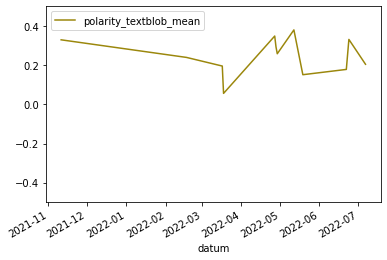

In [371]:
# dataframe for FDP for wp20 for category klimaschutz
df_klima_wp20_fdp = df_klima_wp20.loc[df_klima_wp20.partei.apply(lambda par: 'FDP' in par)]

# mean value of polarity score per date for party 
df_klima_wp20_grouped_fdp = df_klima_wp20_fdp.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp20_grouped_fdp = df_klima_wp20_grouped_fdp.add_suffix('_mean').reset_index()

df_klima_wp20_grouped_fdp.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='#9b870c')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## BÜNDNIS 90/DIE GRÜNEN

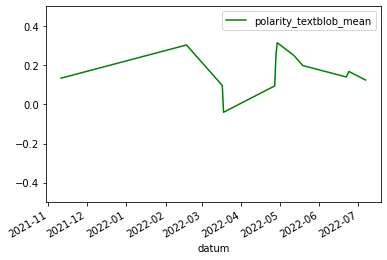

In [372]:
# dataframe for BÜNDNIS 90/DIE GRÜNEN for wp20 for category klimaschutz
df_klima_wp20_gruene = df_klima_wp20.loc[df_klima_wp20.partei.apply(lambda par: 'BÜNDNIS 90/DIE GRÜNEN' in par)]

# mean value of polarity score per date for party 
df_klima_wp20_grouped_gruene = df_klima_wp20_gruene.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp20_grouped_gruene = df_klima_wp20_grouped_gruene.add_suffix('_mean').reset_index()

df_klima_wp20_grouped_gruene.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='green')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## SPD

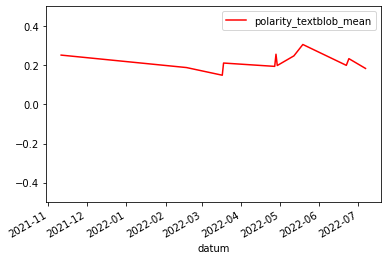

In [373]:
# dataframe for SPD for wp19 for category klimaschutz
df_klima_wp20_SPD = df_klima_wp20.loc[df_klima_wp20.partei.apply(lambda par: 'SPD' in par)]

# mean value of polarity score per date for party 
df_klima_wp20_grouped_SPD = df_klima_wp20_SPD.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_klima_wp20_grouped_SPD = df_klima_wp20_grouped_SPD.add_suffix('_mean').reset_index()

df_klima_wp20_grouped_SPD.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='red')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## 5. Visualisierung der Unterschiede

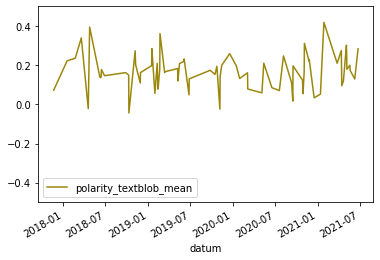

In [374]:
# fdp wp19 (nicht regierend)
df_klima_wp19_grouped_fdp.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='#9b870c')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

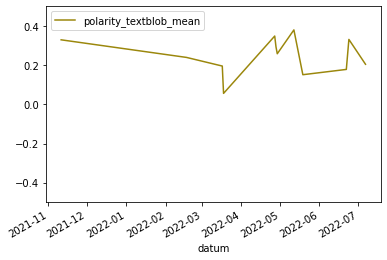

In [375]:
# fdp wp20 (regierend)
df_klima_wp20_grouped_fdp.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='#9b870c')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

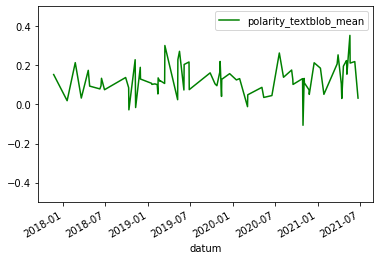

In [376]:
# grünen wp19 (nicht regierend)
df_klima_wp19_grouped_gruene.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='green')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

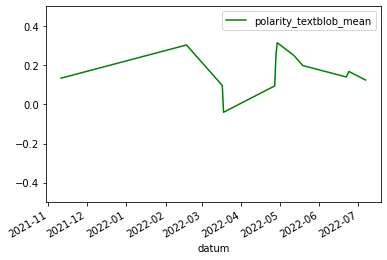

In [377]:
# grünen wp20 (regierend)
df_klima_wp20_grouped_gruene.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='green')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

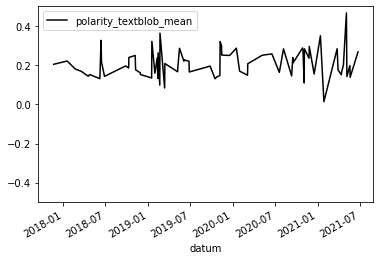

In [378]:
# CDU/CSU wp19 (regierend)
df_klima_wp19_grouped_CDU_CSU.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='black')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

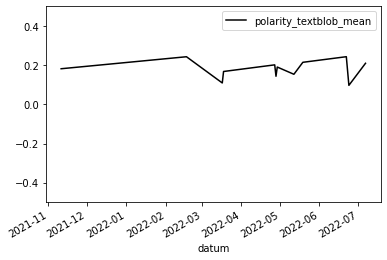

In [379]:
# CDU/CSU wp20 (nicht regierend)
df_klima_wp20_grouped_CDU_CSU.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='black')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

# Thema: Russland

In [380]:
# filter data set to categories specific to Russia for all parties

df_russ = df.loc[df.kategorie.apply(lambda cat: 'Russland' in cat)]

df_russ

,tagesordnungspunkt,partei,rede,kategorie,datum,thema
3726,Tagesordnungspunkt 7,AFD,Frau Präsidentin! Meine Damen und Herren! Stel...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...
3727,Tagesordnungspunkt 7,AFD,"Lieber Kollege Hardt, Sie machen hier genau da...",Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...
3728,Tagesordnungspunkt 7,AFD,Sehr geehrte Damen und Herren! Frau Präsidenti...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...
3729,Tagesordnungspunkt 7,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...
3730,Tagesordnungspunkt 7,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...
...,...,...,...,...,...,...
14072,Tagesordnungspunkt 4,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...
14073,Tagesordnungspunkt 4,CDU/CSU,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...
14074,Tagesordnungspunkt 4,DIE LINKE,Vielen Dank. – Herr Präsident! Meine Damen und...,Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...
14075,Tagesordnungspunkt 4,FDP,"Vielen Dank, Herr Präsident. – Meine Damen und...",Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...


# Sentiment-Analyse mit TextBlob

In [381]:

# adds polarity value using textblob
from textblob_de import TextBlobDE as TextBlob
import matplotlib.pyplot as plt
from pandarallel import pandarallel  # parallelization
pandarallel.initialize()

def get_polarity(input_speech):
    speech = TextBlob(input_speech)
    return speech.sentiment.polarity

df_russ["polarity_textblob"] = df_russ.parallel_apply(lambda row: get_polarity(row["rede"]), axis=1)
df_russ

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


<ipython-input-381-993a9ca64400>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_russ["polarity_textblob"] = df_russ.parallel_apply(lambda row: get_polarity(row["rede"]), axis=1)


,tagesordnungspunkt,partei,rede,kategorie,datum,thema,polarity_textblob
3726,Tagesordnungspunkt 7,AFD,Frau Präsidentin! Meine Damen und Herren! Stel...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,1.134615e-01
3727,Tagesordnungspunkt 7,AFD,"Lieber Kollege Hardt, Sie machen hier genau da...",Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,2.555556e-01
3728,Tagesordnungspunkt 7,AFD,Sehr geehrte Damen und Herren! Frau Präsidenti...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,3.783784e-02
3729,Tagesordnungspunkt 7,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,2.825397e-01
3730,Tagesordnungspunkt 7,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,1.779070e-01
...,...,...,...,...,...,...,...
14072,Tagesordnungspunkt 4,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...,3.202020e-01
14073,Tagesordnungspunkt 4,CDU/CSU,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...,-2.130435e-01
14074,Tagesordnungspunkt 4,DIE LINKE,Vielen Dank. – Herr Präsident! Meine Damen und...,Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...,3.172066e-18
14075,Tagesordnungspunkt 4,FDP,"Vielen Dank, Herr Präsident. – Meine Damen und...",Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...,1.178571e-01


In [382]:
#filter date for 'Wahlperiode 19' which are speeches before 26. Oktober 2021
df_russ_wp19 = df_russ.loc[df_russ.datum.apply(lambda date: date < pd.to_datetime('2021-10-26'))]
df_russ_wp19

,tagesordnungspunkt,partei,rede,kategorie,datum,thema,polarity_textblob
4657,Tagesordnungspunkt 11,AFD,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,Russland,2019-10-24,a) Beschlussempfehlung und Bericht des Auswärt...,2.430556e-01
4658,Tagesordnungspunkt 11,BÜNDNIS 90/DIE GRÜNEN,Liebe Frau Präsidentin! Liebe Kolleginnen und ...,Russland,2019-10-24,a) Beschlussempfehlung und Bericht des Auswärt...,2.673387e-01
4659,Tagesordnungspunkt 11,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Russland,2019-10-24,a) Beschlussempfehlung und Bericht des Auswärt...,3.396505e-01
4660,Tagesordnungspunkt 11,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Russland,2019-10-24,a) Beschlussempfehlung und Bericht des Auswärt...,4.268293e-03
4661,Tagesordnungspunkt 11,CDU/CSU,"Vielen Dank, Frau Präsidentin. – Meine sehr ge...",Russland,2019-10-24,a) Beschlussempfehlung und Bericht des Auswärt...,2.725877e-01
...,...,...,...,...,...,...,...
14072,Tagesordnungspunkt 4,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...,3.202020e-01
14073,Tagesordnungspunkt 4,CDU/CSU,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...,-2.130435e-01
14074,Tagesordnungspunkt 4,DIE LINKE,Vielen Dank. – Herr Präsident! Meine Damen und...,Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...,3.172066e-18
14075,Tagesordnungspunkt 4,FDP,"Vielen Dank, Herr Präsident. – Meine Damen und...",Russland,2021-05-19,Antrag der Fraktion DIE LINKE: 80 Jahre deutsc...,1.178571e-01


In [383]:
#values y scale
ymin = -0.50
ymax = 0.50

## 1 . Positionierung nicht-regierender Parteien beim Thema Russland (Wahlperiode 19)

## FDP 

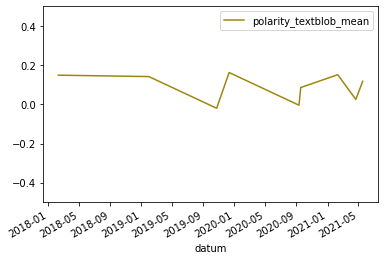

In [384]:
# dataframe for FDP for wp19 for category Russia
df_russ_wp19_fdp = df_russ_wp19.loc[df_russ_wp19.partei.apply(lambda par: 'FDP' in par)]

# mean value of polarity score per date for party 
df_russ_wp19_grouped_fdp = df_russ_wp19_fdp.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_russ_wp19_grouped_fdp = df_russ_wp19_grouped_fdp.add_suffix('_mean').reset_index()

df_russ_wp19_grouped_fdp.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='#9b870c')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## BÜNDNIS 90/DIE GRÜNEN

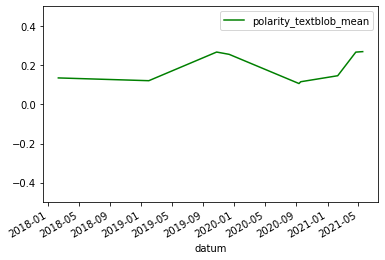

In [385]:
# dataframe for BÜNDNIS 90/DIE GRÜNEN for wp19 for category Russia
df_russ_wp19_gruene = df_russ_wp19.loc[df_russ_wp19.partei.apply(lambda par: 'BÜNDNIS 90/DIE GRÜNEN' in par)]

# mean value of polarity score per date for party 
df_russ_wp19_grouped_gruene = df_russ_wp19_gruene.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_russ_wp19_grouped_gruene = df_russ_wp19_grouped_gruene.add_suffix('_mean').reset_index()

df_russ_wp19_grouped_gruene.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='green')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## 2. Positionierung regierender Parteien beim Thema Russland (Wahlperiode 19)


## CDU/CSU

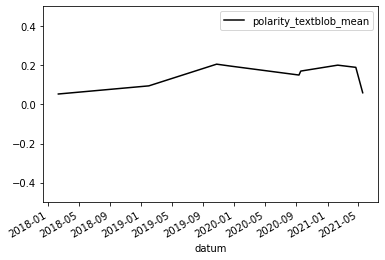

In [386]:
# dataframe for CDU/CSU for wp19 for category Russia
df_russ_wp19_CDU_CSU = df_russ_wp19.loc[df_russ_wp19.partei.apply(lambda par: 'CDU/CSU' in par)]

# mean value of polarity score per date for party 
df_russ_wp19_grouped_CDU_CSU = df_russ_wp19_CDU_CSU.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_russ_wp19_grouped_CDU_CSU = df_russ_wp19_grouped_CDU_CSU.add_suffix('_mean').reset_index()

df_russ_wp19_grouped_CDU_CSU.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='black')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## SPD

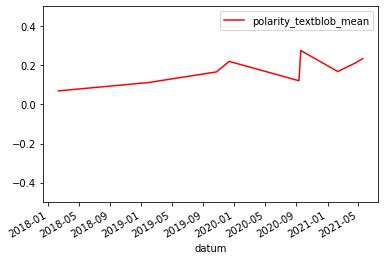

In [387]:
# dataframe for SPD for wp19 for category Russia
df_russ_wp19_SPD = df_russ_wp19.loc[df_russ_wp19.partei.apply(lambda par: 'SPD' in par)]

# mean value of polarity score per date for party 
df_russ_wp19_grouped_SPD = df_russ_wp19_SPD.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_russ_wp19_grouped_SPD = df_russ_wp19_grouped_SPD.add_suffix('_mean').reset_index()

df_russ_wp19_grouped_SPD.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='red')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## 3. Positionierung der nicht regierenden Parteien beim Thema Russland (Wahlperiode 20)

In [388]:
#filter date for 'Wahlperiode 20' which are speeches after 26. Oktober 2021
df_russ_wp20 = df_russ.loc[df_russ.datum.apply(lambda date: date >= pd.to_datetime('2021-10-26'))]
df_russ_wp20

,tagesordnungspunkt,partei,rede,kategorie,datum,thema,polarity_textblob
3726,Tagesordnungspunkt 7,AFD,Frau Präsidentin! Meine Damen und Herren! Stel...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,0.113462
3727,Tagesordnungspunkt 7,AFD,"Lieber Kollege Hardt, Sie machen hier genau da...",Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,0.255556
3728,Tagesordnungspunkt 7,AFD,Sehr geehrte Damen und Herren! Frau Präsidenti...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,0.037838
3729,Tagesordnungspunkt 7,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,0.282540
3730,Tagesordnungspunkt 7,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Russland,2022-02-17,a) Antrag der Fraktion der CDU/CSU: Russlands ...,0.177907
...,...,...,...,...,...,...,...
14023,Tagesordnungspunkt 26,DIE LINKE,Sehr geehrte Frau Präsidentin! Meine Damen und...,Russland,2022-05-12,Antrag der Fraktion der CDU/CSU: Schnelle und ...,0.190667
14024,Tagesordnungspunkt 26,FDP,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Russland,2022-05-12,Antrag der Fraktion der CDU/CSU: Schnelle und ...,0.329881
14025,Tagesordnungspunkt 26,SPD,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Russland,2022-05-12,Antrag der Fraktion der CDU/CSU: Schnelle und ...,0.404605
14026,Tagesordnungspunkt 26,SPD,Sehr geehrte Frau Präsidentin! Sehr geehrte Ko...,Russland,2022-05-12,Antrag der Fraktion der CDU/CSU: Schnelle und ...,0.201488



## CDU/CSU

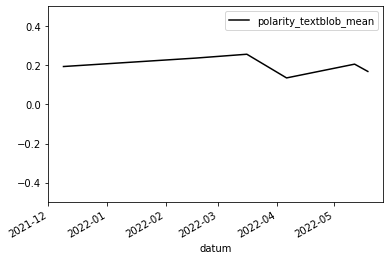

In [389]:
# dataframe for CDU/CSU for wp19 for category Russia
df_russ_wp20_CDU_CSU = df_russ_wp20.loc[df_russ_wp20.partei.apply(lambda par: 'CDU/CSU' in par)]

# mean value of polarity score per date for party 
df_russ_wp20_grouped_CDU_CSU = df_russ_wp20_CDU_CSU.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_russ_wp20_grouped_CDU_CSU = df_russ_wp20_grouped_CDU_CSU.add_suffix('_mean').reset_index()

df_russ_wp20_grouped_CDU_CSU.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='black')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## 4. Positionierung der regierenden Parteien beim Thema Russland (Wahlperiode 20)

## SPD

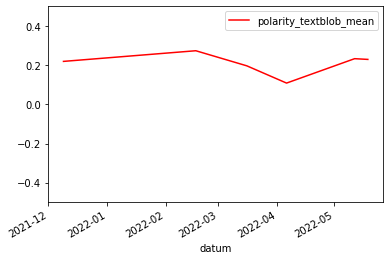

In [390]:
# dataframe for SPD for wp20 for category Russia
df_russ_wp20_SPD = df_russ_wp20.loc[df_russ_wp20.partei.apply(lambda par: 'SPD' in par)]

# mean value of polarity score per date for party 
df_russ_wp20_grouped_SPD = df_russ_wp20_SPD.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_russ_wp20_grouped_SPD = df_russ_wp20_grouped_SPD.add_suffix('_mean').reset_index()

df_russ_wp20_grouped_SPD.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='red')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## BÜNDNIS 90/DIE GRÜNEN

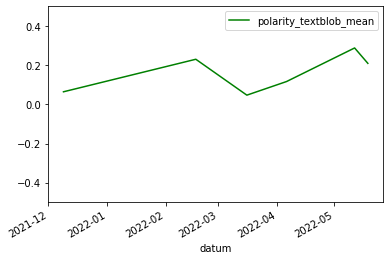

In [391]:
# dataframe for BÜNDNIS 90/DIE GRÜNEN for wp20 for category Russia
df_russ_wp20_gruene = df_russ_wp20.loc[df_russ_wp20.partei.apply(lambda par: 'BÜNDNIS 90/DIE GRÜNEN' in par)]

# mean value of polarity score per date for party 
df_russ_wp20_grouped_gruene = df_russ_wp20_gruene.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_russ_wp20_grouped_gruene = df_russ_wp20_grouped_gruene.add_suffix('_mean').reset_index()

df_russ_wp20_grouped_gruene.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='green')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## FDP

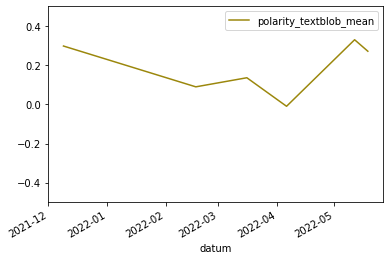

In [392]:
# dataframe for FDP for wp20 for category Russia
df_russ_wp20_fdp = df_russ_wp20.loc[df_russ_wp20.partei.apply(lambda par: 'FDP' in par)]

# mean value of polarity score per date for party 
df_russ_wp20_grouped_fdp = df_russ_wp20_fdp.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_russ_wp20_grouped_fdp = df_russ_wp20_grouped_fdp.add_suffix('_mean').reset_index()

df_russ_wp20_grouped_fdp.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='#9b870c')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

## 5. Visualisierung der Unterschiede

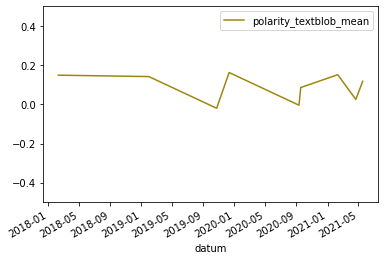

In [393]:
# FDP wp 19 (nicht regierend)
df_russ_wp19_grouped_fdp.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='#9b870c')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

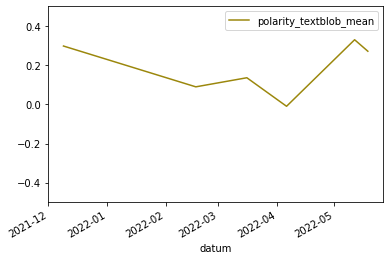

In [394]:
# FDP wp 19 (regierend)
df_russ_wp20_grouped_fdp.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='#9b870c')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

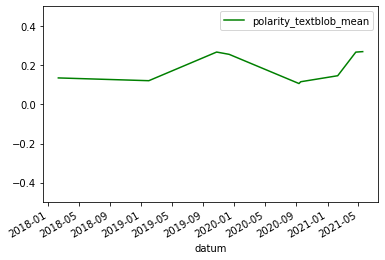

In [395]:
# Grünen wp19 (nicht regierend)
df_russ_wp19_grouped_gruene.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='green')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

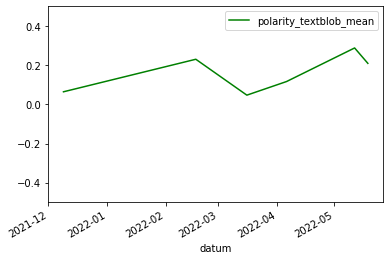

In [396]:
# Grünen wp20 (regierend)
df_russ_wp20_grouped_gruene.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='green')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

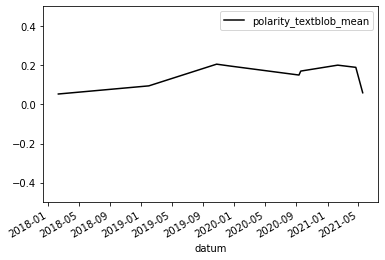

In [397]:
# CDU/CSU wp19  (regierend)
df_russ_wp19_grouped_CDU_CSU.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='black')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

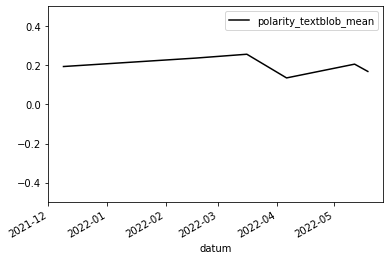

In [398]:
# CDU/CSU wp20 (nicht regierend)
df_russ_wp20_grouped_CDU_CSU.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color='black')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
plt.show()

# Forschungsfrage 2

# Paul Nebatz
## Forschungsfrage 2 (Aufbereitung Datensatz mit Tina Puddu)

In [399]:
# imports
import os, os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import Ausgangsdatensatz

In [400]:
df = pd.read_csv("Bundestagsdaten_mit_Kategorie.csv", sep=";")
df['datum'] = pd.to_datetime(df['datum'], format="%d%m%Y")
df

,tagesordnungspunkt,partei,rede,kategorie,datum,thema
0,Tagesordnungspunkt 13,AFD,Sehr geehrte Frau Präsidentin! Sehr geehrte Ko...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
1,Tagesordnungspunkt 13,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Meine Damen und Herren! In D...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
2,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
3,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
4,Tagesordnungspunkt 13,DIE LINKE,Frau Präsidentin! Meine Damen und Herren! Die ...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
...,...,...,...,...,...,...
25923,Tagesordnungspunkt 32,SPD,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Menschenrechte,2020-11-26,a) Zweite und dritte Beratung des von den Abge...
25924,Tagesordnungspunkt 32,SPD,"Herr Präsident, ich nehme die Wahl an, und ich...",Menschenrechte,2020-11-26,a) Zweite und dritte Beratung des von den Abge...
25925,Tagesordnungspunkt 3,SPD,"Sehr geehrter Herr Alterspräsident, die SPD-Bu...",Sonstiges,2021-10-26,Wahl der Präsidentin/des Präsidenten verbunden...
25926,Tagesordnungspunkt 3,SPD,"Herr Alterspräsident, vielen Dank. Ich nehme d...",Sonstiges,2021-10-26,Wahl der Präsidentin/des Präsidenten verbunden...


Aggregation der Daten

In [401]:

# filtert das ursprüngliche dataset jeweils nach den Datumsangaben in Datensets für Periode 19 und 20
# anschließend werden die Werte der zeigen auf Kategorie aggregiert durch Zählen des Auftretens der themen
# und schließlich wird das ganze in einem neuen df_result Dataframe gespeichert und die Spaltennamen entsprechend angepasst

df_result = pd.concat([df[df['datum']<pd.Timestamp(2021,10,26)]['kategorie'].value_counts(), df[df['datum']>pd.Timestamp(2021,10,25)]['kategorie'].value_counts()], axis=1, join="outer")

# Spalten sinnvoll benennen
df_result.columns = ['Anzahl Periode 19', 'Anzahl Periode 20']

# NaN Werte die bei concat entstehen durch 0 ersetzen für spätere numerische Auswertungen
df_result['Anzahl Periode 19'] = df_result['Anzahl Periode 19'].fillna(0)
df_result['Anzahl Periode 20'] = df_result['Anzahl Periode 20'].fillna(0)

df_result

,Anzahl Periode 19,Anzahl Periode 20
Sonstiges,8739.0,2003.0
Klimaschutz,1115.0,168.0
Bildung,847.0,75.0
Beteiligung bewaffneter Streitkräfte,764.0,158.0
Digitalisierung,762.0,36.0
...,...,...
Mindestlohn,11.0,15.0
Patentrecht,8.0,0.0
corona,7.0,0.0
wohnen,3.0,0.0


Normalisierung für 199% stacked bar chart

In [402]:
# Anzahl der Dateien in Wahlperiodenordner = Anzahl der Plenarsitzungen während der jeweiligen Legislaturperiode
# -> 20. Periode noch im Gange, ensprechend weniger Sitzungen -> entsprechend weniger Themen angesprochen

df_result_normalisiert = df_result.copy()

anzahl_plenarsitzungen_periode19 = len([name for name in os.listdir('Wahlperiode19') if os.path.isfile(os.path.join('Wahlperiode19', name))])

anzahl_plenarsitzungen_periode20 = len([name for name in os.listdir('Wahlperiode20') if os.path.isfile(os.path.join('Wahlperiode20', name))])

normalisierungsfaktor_periode19 =  anzahl_plenarsitzungen_periode20 / anzahl_plenarsitzungen_periode19

df_result_normalisiert['Anzahl Periode 19'] = (df_result_normalisiert['Anzahl Periode 19'] * normalisierungsfaktor_periode19).round()

df_result_normalisiert

,Anzahl Periode 19,Anzahl Periode 20
Sonstiges,1777.0,2003.0
Klimaschutz,227.0,168.0
Bildung,172.0,75.0
Beteiligung bewaffneter Streitkräfte,155.0,158.0
Digitalisierung,155.0,36.0
...,...,...
Mindestlohn,2.0,15.0
Patentrecht,2.0,0.0
corona,1.0,0.0
wohnen,1.0,0.0


In [403]:

# Hilfsspalte: zeilenweise Summe der Ergebnisse
df_result_normalisiert['insgesamt'] = df_result_normalisiert['Anzahl Periode 19'] + df_result_normalisiert['Anzahl Periode 20']

# Prozentuales vorkommen der Themen in Perioden berechnen mit Hilfsspalte
df_result_normalisiert['Periode 19 %'] = df_result_normalisiert['Anzahl Periode 19'] / df_result_normalisiert['insgesamt']
df_result_normalisiert['Periode 20 %'] = df_result_normalisiert['Anzahl Periode 20'] / df_result_normalisiert['insgesamt']

# Überflüssige Spalten entfernen
df_result_normalisiert.drop(['Anzahl Periode 19', 'Anzahl Periode 20', 'insgesamt'], axis=1, inplace=True)

df_result_normalisiert

,Periode 19 %,Periode 20 %
Sonstiges,0.470106,0.529894
Klimaschutz,0.574684,0.425316
Bildung,0.696356,0.303644
Beteiligung bewaffneter Streitkräfte,0.495208,0.504792
Digitalisierung,0.811518,0.188482
...,...,...
Mindestlohn,0.117647,0.882353
Patentrecht,1.000000,0.000000
corona,1.000000,0.000000
wohnen,1.000000,0.000000


In [404]:
df_result_normalisiert['sorting'] = df_result_normalisiert['Periode 19 %'] - df_result_normalisiert['Periode 20 %']
df_result_normalisiert = df_result_normalisiert.sort_values(by=['sorting'], ascending=True)

df_result_normalisiert.drop(['sorting'], axis=1, inplace=True)

df_result_normalisiert

,Periode 19 %,Periode 20 %
Ukraine,0.000000,1.000000
Coronaimpfung,0.086957,0.913043
Mindestlohn,0.117647,0.882353
Energieversorgung,0.125000,0.875000
pflege,0.142857,0.857143
...,...,...
Tierschutz,1.000000,0.000000
Lobby,1.000000,0.000000
Solidaritätszuschlag,1.000000,0.000000
Deutsche Einheit,1.000000,0.000000


## Normalisiertes 100% stacked bar chart

Die errechnete Grafik zeigt wie stark Themen prozentual unter der alten und neuen Regierung vertreten sind.
Dabei wurden die Werte normalisiert um eine realistische Verteilung zu erreichen, jedoch muss auf den Bias hinter dem manuell einkategorisierten Punkt "Sonstiges" sowie der Tatsache, dass eine Normalisierung der Zahlen nicht die fehlende Prognose möglicherweise noch auftretende Themen im Rahmen der Arbeit der neuen Regierung auffangen kann hingewiesen werden.

Entsprechend werden im weiteren Verlauf noch sinnvollere Visualisierungsformen erarbeitet.

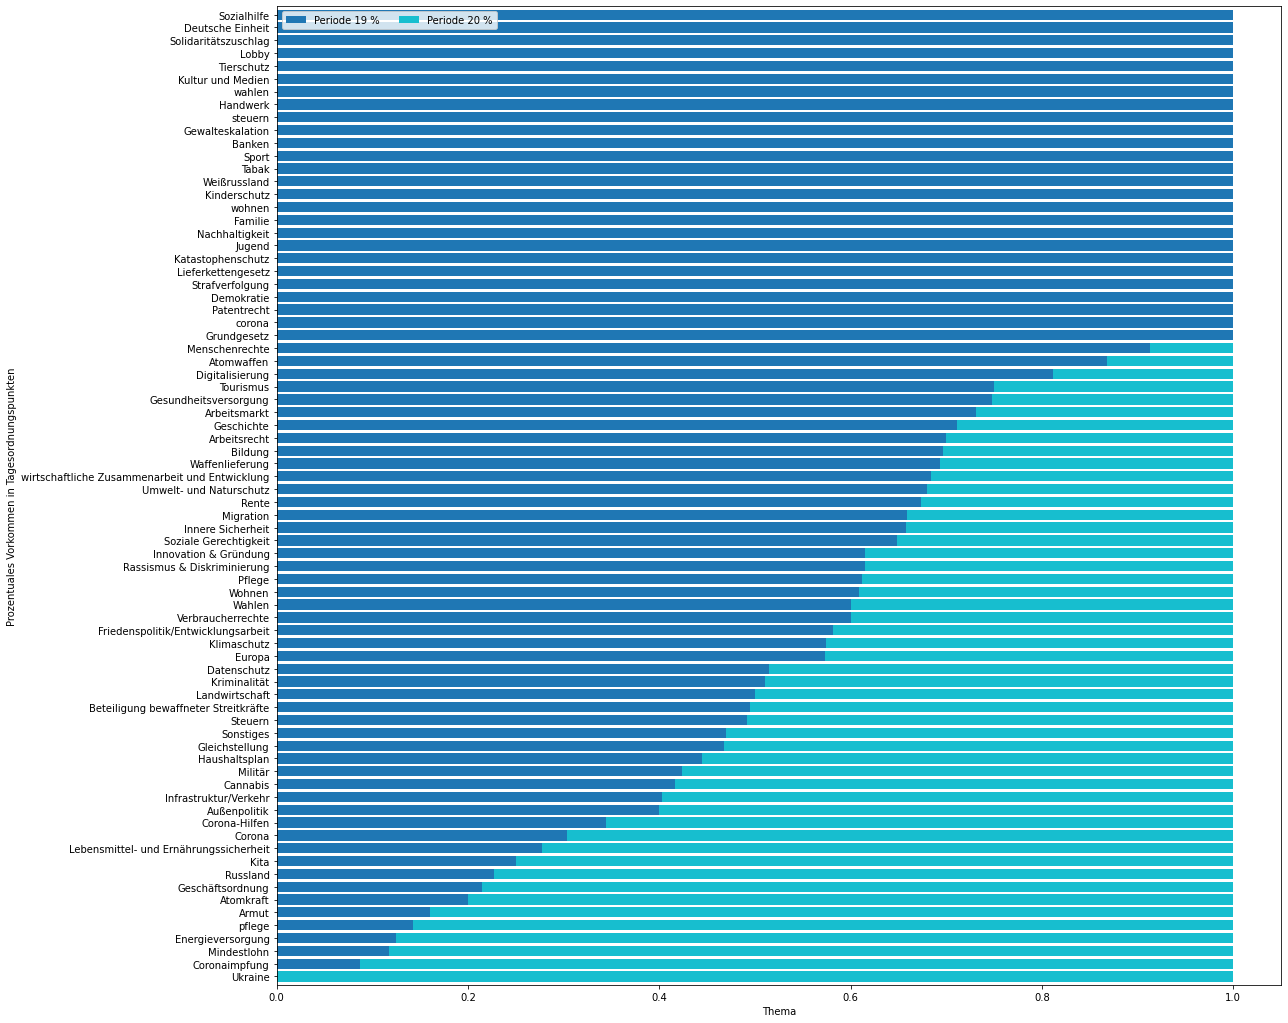

In [405]:
df_result_normalisiert.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(18, 18),
                    width=0.8)

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Thema")
plt.ylabel("Prozentuales Vorkommen in Tagesordnungspunkten")
plt.show()

## Relative Verteilung

In [406]:
# Entfernen der nichts aussagenden Spalte Sonstiges die durch ihre reine Menge Graphen verzerren kann
# "Sonstiges" in Periode 19 macht dabei 40% der Themen aus und in Periode 20 etwa 49%
df_relative_aenderung = df_result.drop('Sonstiges')

<AxesSubplot:>

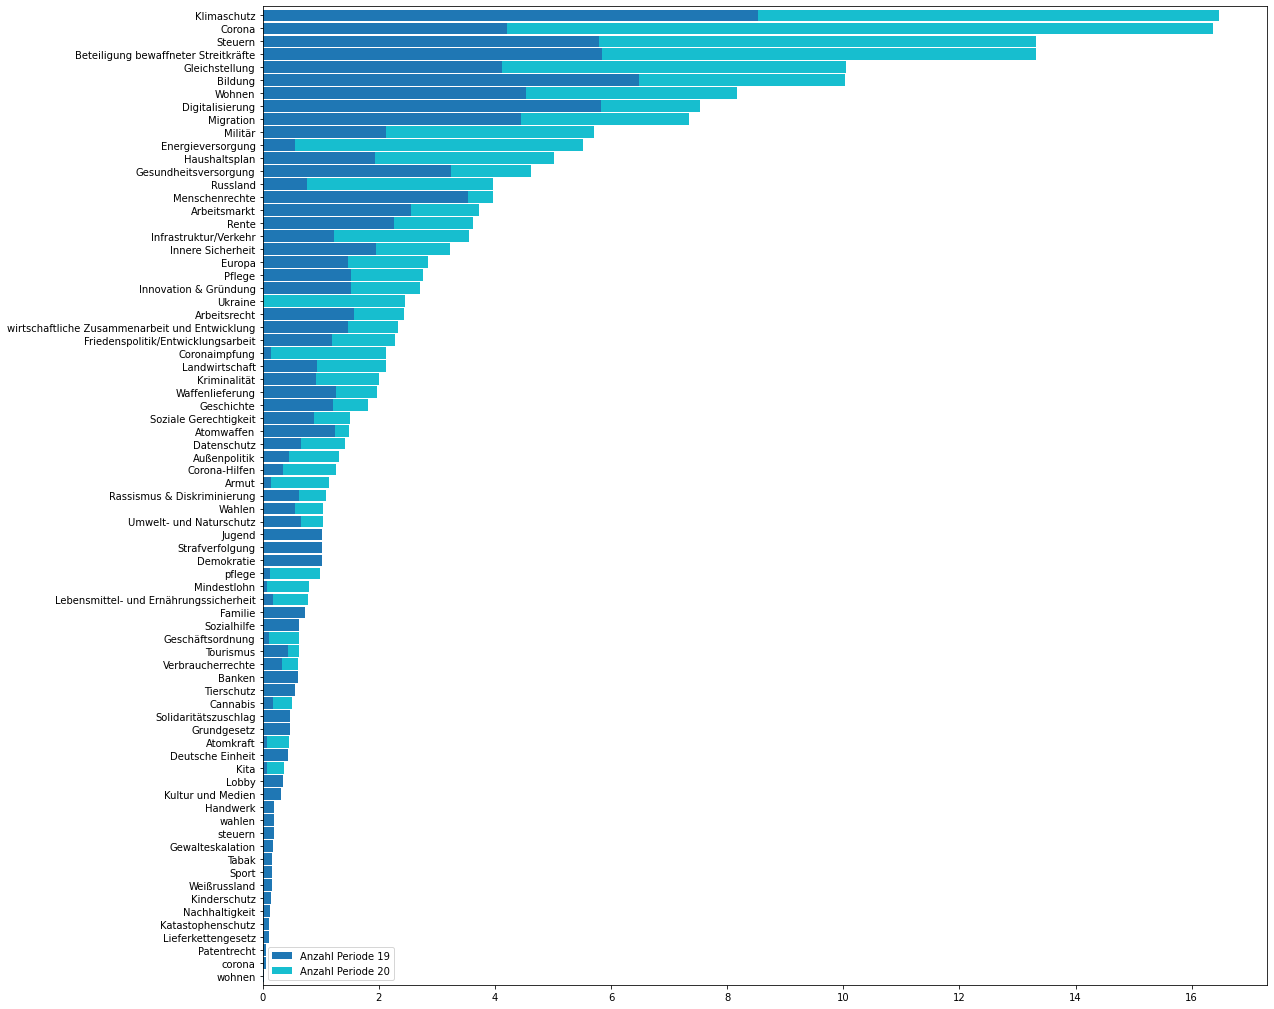

In [407]:
df_relative_aenderung['Anzahl Periode 19'] = df_relative_aenderung['Anzahl Periode 19'].fillna(0)
df_relative_aenderung['Anzahl Periode 20'] = df_relative_aenderung['Anzahl Periode 20'].fillna(0)


df_relative_aenderung['Anzahl Periode 19'] = df_relative_aenderung['Anzahl Periode 19'] / df_relative_aenderung['Anzahl Periode 19'].sum() * 100
df_relative_aenderung['Anzahl Periode 20'] = df_relative_aenderung['Anzahl Periode 20'] / df_relative_aenderung['Anzahl Periode 20'].sum() * 100

df_relative_aenderung['sorting'] = df_relative_aenderung['Anzahl Periode 19'] + df_relative_aenderung['Anzahl Periode 20']
df_relative_aenderung = df_relative_aenderung.sort_values(by=['sorting'], ascending=True)

df_relative_aenderung.drop(['sorting'], axis=1, inplace=True)


df_relative_aenderung.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(18, 18),
                    width=0.9)

<AxesSubplot:>

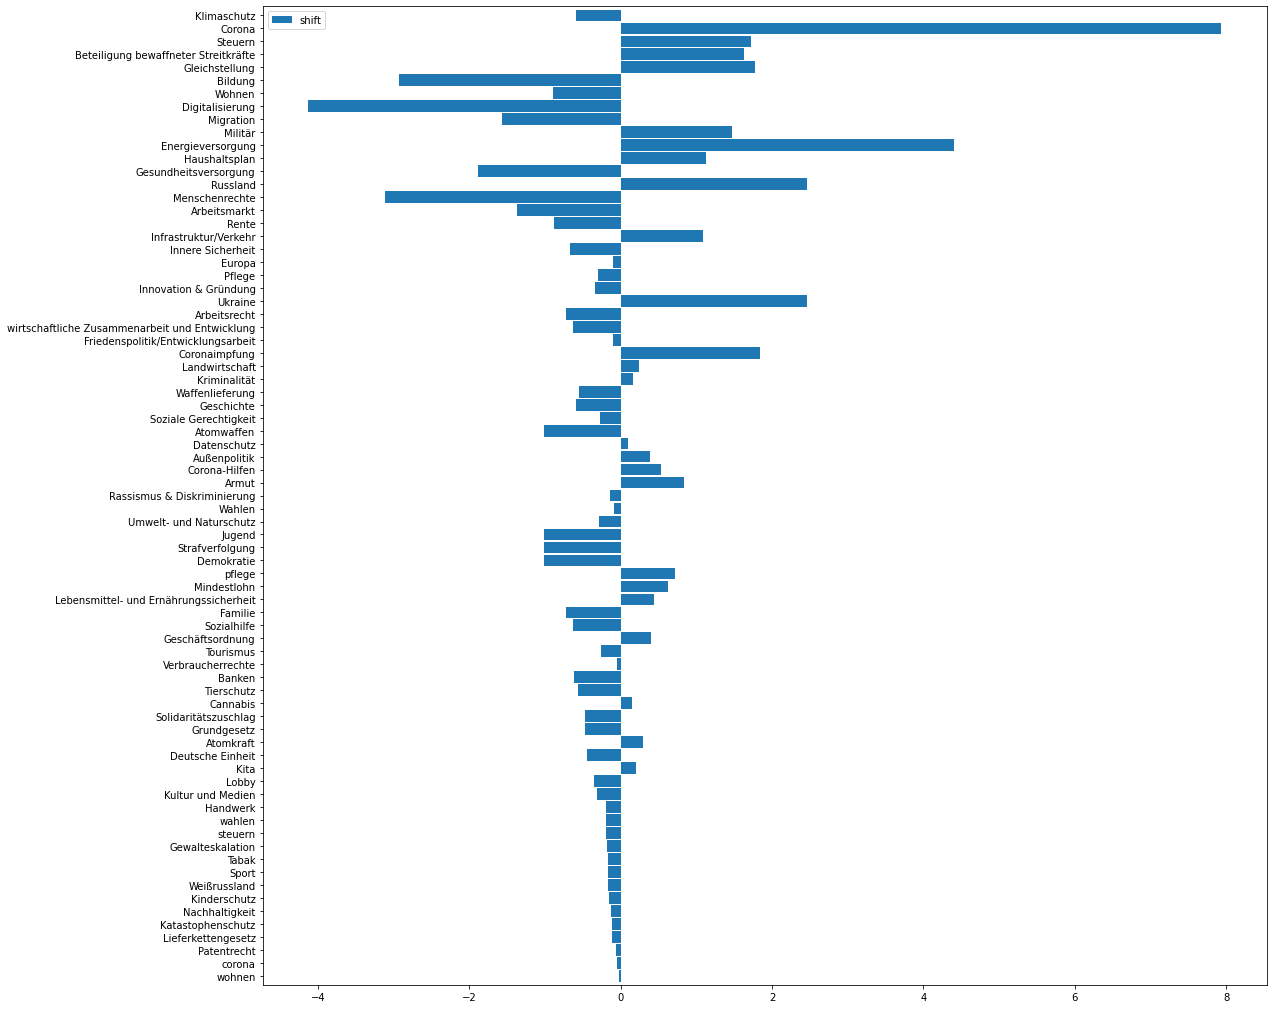

In [408]:
new_df = pd.DataFrame()
new_df.index = df_relative_aenderung.index
new_df['shift'] = df_relative_aenderung['Anzahl Periode 20'] - df_relative_aenderung['Anzahl Periode 19']

new_df.plot(kind='barh', 
                    colormap='tab10', 
                    figsize=(18, 18),
                    width=0.9)

# Forschungsfrage 3

# Tina Puddu
## Forschungsfrage 3

In [410]:
# imports
import pandas as pd
import numpy as np

## Aufbereitung analog zu Forschungsfrage 2 (mit Paul Nebatz)

In [411]:
df = pd.read_csv("Bundestagsdaten_mit_Kategorie.csv", sep=";")
df['datum'] = pd.to_datetime(df['datum'], format="%d%m%Y")
df

# filtert das ursprüngliche dataset jeweils nach den Datumsangaben in Datensets für Periode 19 und 20
# anschließend werden die Werte der zeigen auf Kategorie aggregiert durch Zählen des Auftretens der themen
# und schließlich wird das ganze in einem neuen df_for_plot Dataframe gespeichert und die Spaltennamen entsprechend angepasst

df_for_plot = pd.concat([df[df['datum']<pd.Timestamp(2021,10,26)]['kategorie'].value_counts(), df[df['datum']>pd.Timestamp(2021,10,25)]['kategorie'].value_counts()], axis=1, join="outer")

# Spalten sinnvoll benennen
df_for_plot.columns = ['Anzahl Periode 19', 'Anzahl Periode 20']

# NaN Werte die bei concat entstehen durch 0 ersetzen für spätere numerische Auswertungen
df_for_plot['Anzahl Periode 19'] = df_for_plot['Anzahl Periode 19'].fillna(0)
df_for_plot['Anzahl Periode 20'] = df_for_plot['Anzahl Periode 20'].fillna(0)

# Entfernen der nichts aussagenden Spalte Sonstiges die durch ihre reine Menge Graphen verzerren kann
# "Sonstiges" in Periode 19 macht dabei 40% der Themen aus und in Periode 20 etwa 49%
df_for_plot = df_for_plot.drop('Sonstiges')


df_for_plot['Anzahl Periode 19'] = df_for_plot['Anzahl Periode 19'] / df_for_plot['Anzahl Periode 19'].sum() * 100
df_for_plot['Anzahl Periode 20'] = df_for_plot['Anzahl Periode 20'] / df_for_plot['Anzahl Periode 20'].sum() * 100

df_for_plot['sorting'] = df_for_plot['Anzahl Periode 19'] + df_for_plot['Anzahl Periode 20']
df_for_plot = df_for_plot.sort_values(by=['sorting'], ascending=True)

df_for_plot.drop(['sorting'], axis=1, inplace=True)

df_temp_graph = pd.DataFrame()
df_temp_graph.index = df_for_plot.index
df_temp_graph['shift'] = df_for_plot['Anzahl Periode 20'] - df_for_plot['Anzahl Periode 19']

df_temp_graph.reset_index(inplace=True)

df_temp_graph

,index,shift
0,wohnen,-0.022952
1,corona,-0.053554
2,Patentrecht,-0.061204
3,Lieferkettengesetz,-0.114758
4,Katastophenschutz,-0.114758
...,...,...
70,Gleichstellung,1.778882
71,Beteiligung bewaffneter Streitkräfte,1.625449
72,Steuern,1.718633
73,Corona,7.935861


## Kernthemen der Parteien

Ausgabe der Kategorien zur manuellen Zuordnung von Parteien in Excel:

In [412]:
np.savetxt("einzigartige_kategorien_aller_perioden.csv", df.kategorie.unique(), delimiter=";", fmt='%s')

Manuell erstellte Kernthemen aus Parteiprogrammen in Listenform

In [413]:
themen_neue_regierung = ['Digitalisierung', 'Datenschutz', 'Klimaschutz', 'Wohnen', 'Pflege', 'Kita', 'Jugend', 'Bildung', 'Soziale Gerechtigkeit', 'Rente', 'Migration']

In [414]:
#df.rename({'index': 'kategorie'}, axis='columns')
df_temp_graph['kernthema'] = df_temp_graph['index']

In [415]:
df_temp_graph['kernthema'] = df_temp_graph['kernthema'].apply(lambda x: 'neu' if x in themen_neue_regierung else np.NAN)

df_temp_graph.rename({'index': 'Thema', 'shift': 'prozentuale Veränderung', 'kernthema': 'Kernthema'}, axis='columns', inplace=True)

df_temp_graph

,Thema,prozentuale Veränderung,Kernthema
0,wohnen,-0.022952,NaN
1,corona,-0.053554,NaN
2,Patentrecht,-0.061204,NaN
3,Lieferkettengesetz,-0.114758,NaN
4,Katastophenschutz,-0.114758,NaN
...,...,...,...
70,Gleichstellung,1.778882,NaN
71,Beteiligung bewaffneter Streitkräfte,1.625449,NaN
72,Steuern,1.718633,NaN
73,Corona,7.935861,NaN


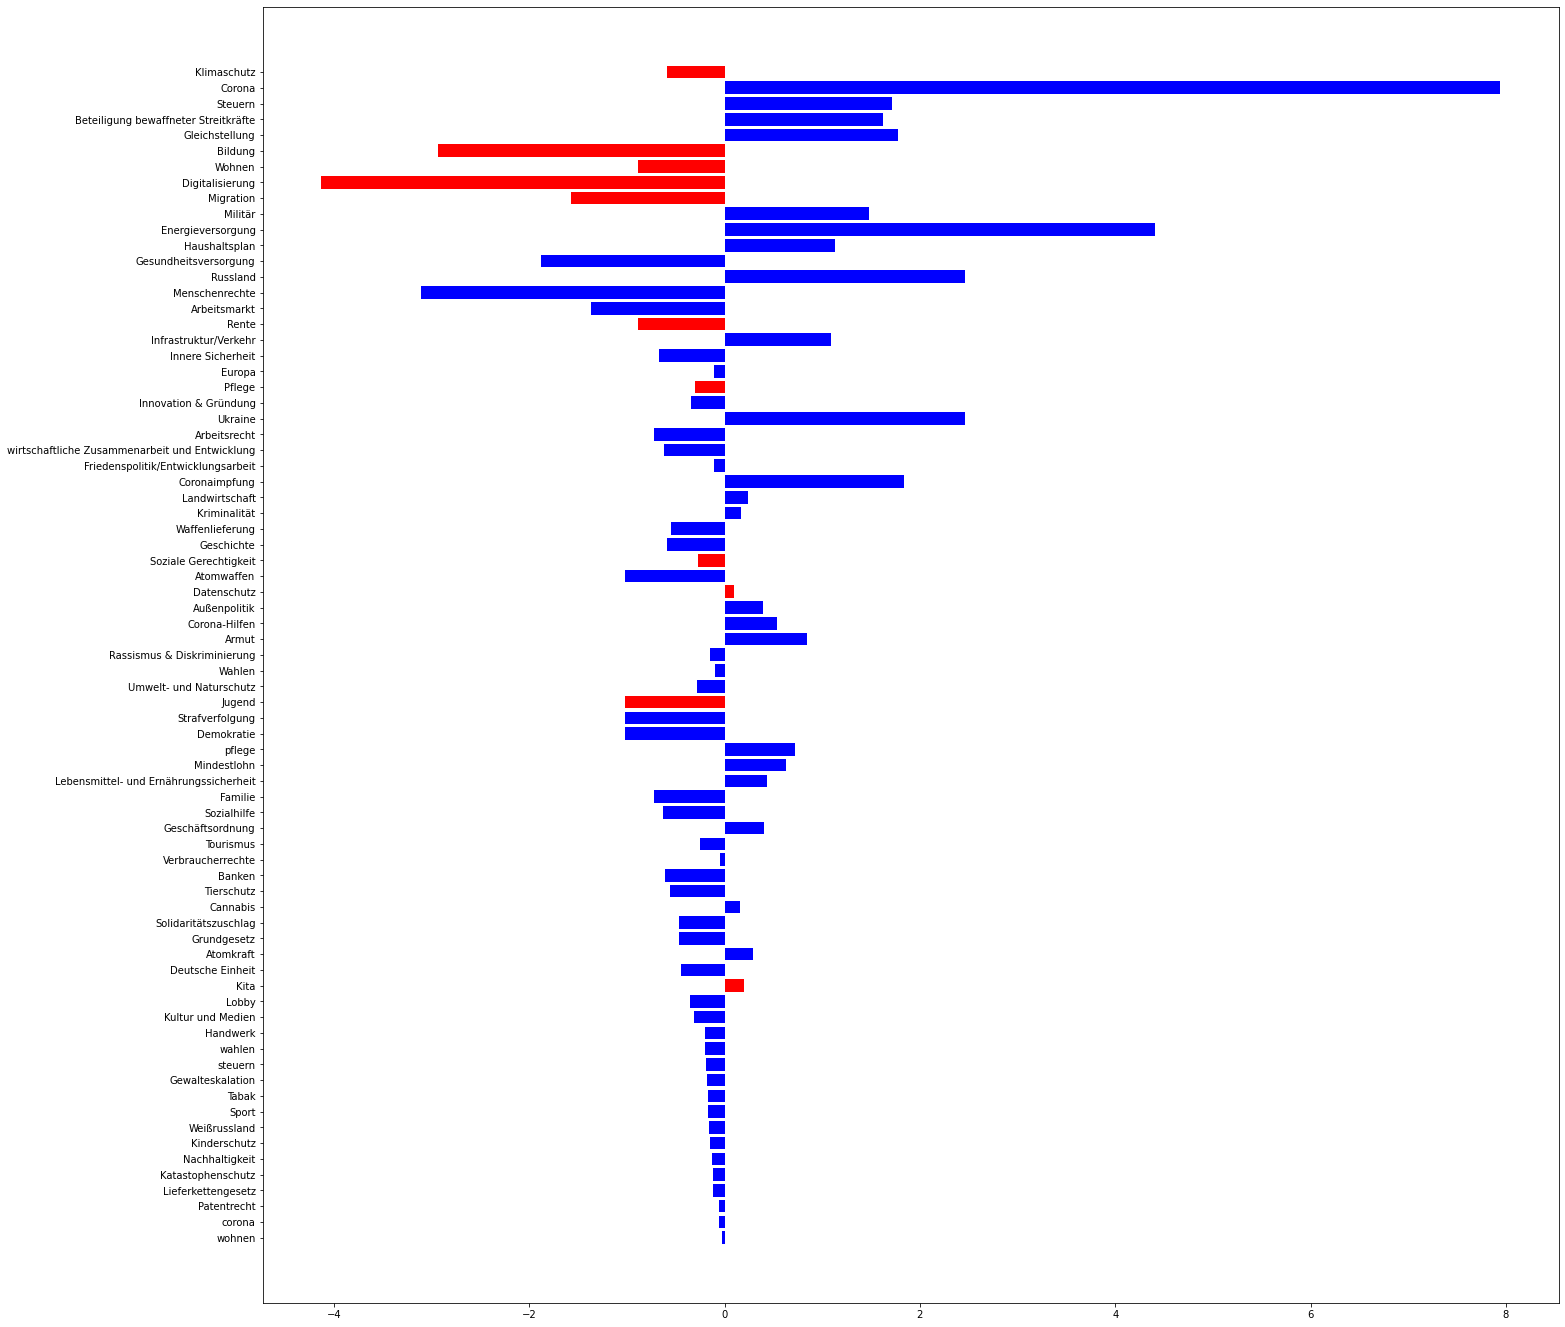

In [416]:
colors = []
for index, row in df_temp_graph.iterrows():
    if row['Kernthema'] == 'neu':
        colors.append('red')
    else:
        colors.append('blue')

fig = plt.figure(figsize=(18,18))
ax = fig.add_axes([0,0,1,1])

ax.barh(df_temp_graph['Thema'],df_temp_graph['prozentuale Veränderung'], color=colors)
plt.show()

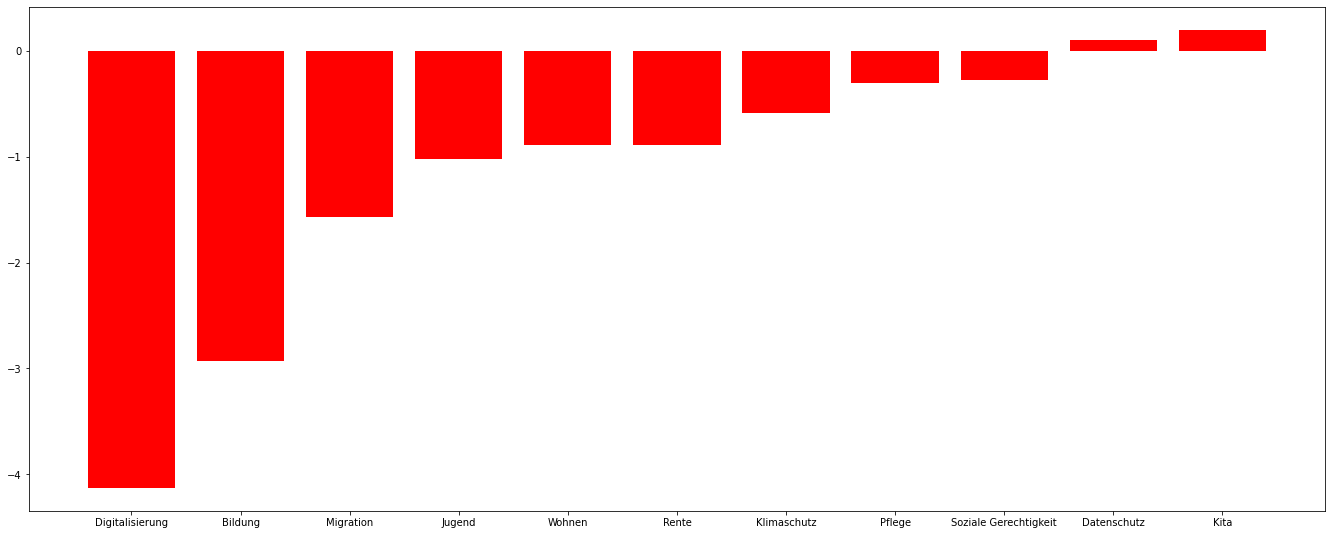

In [417]:
df_filtered = df_temp_graph[df_temp_graph['Kernthema'].notnull()]

df_filtered = df_filtered.sort_values(by=['prozentuale Veränderung'], ascending=True)
df_filtered = df_filtered.sort_values(by=['Kernthema'], ascending=False)

colors = []
for index, row in df_filtered.iterrows():
    if row['Kernthema'] == 'neu':
        colors.append('red')
    else:
        colors.append('blue')

fig = plt.figure(figsize=(18,7))
ax = fig.add_axes([0,0,1,1])

ax.bar(df_filtered['Thema'],df_filtered['prozentuale Veränderung'], color=colors)
plt.show()

## Durchschnittliche Veränderung der Kernthemen der neuen Regierung während ihrer aktuellen Legislaturperiode

In [418]:
df_filtered['prozentuale Veränderung'].mean()

-1.1167456653566068

# Forschungsfrage 4

# Tobias Jennert
## Forschungsfrage 4

In [7]:
#imports 
import pandas as pd
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plot
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob_de import TextBlobDE as TextBlob
from pandarallel import pandarallel  # parallelization
import nltk
nltk.download('punkt')
pandarallel.initialize()

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package punkt to /home/datalore/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:

#read dataset
df = pd.read_csv("Bundestagsdaten_mit_Kategorie.csv", sep=";")
df['datum'] = pd.to_datetime(df['datum'], format="%d%m%Y")
df

,tagesordnungspunkt,partei,rede,kategorie,datum,thema
0,Tagesordnungspunkt 13,AFD,Sehr geehrte Frau Präsidentin! Sehr geehrte Ko...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
1,Tagesordnungspunkt 13,BÜNDNIS 90/DIE GRÜNEN,Frau Präsidentin! Meine Damen und Herren! In D...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
2,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
3,Tagesordnungspunkt 13,CDU/CSU,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
4,Tagesordnungspunkt 13,DIE LINKE,Frau Präsidentin! Meine Damen und Herren! Die ...,Beteiligung bewaffneter Streitkräfte,2019-03-21,– Beschlussempfehlung und Bericht des Auswärti...
...,...,...,...,...,...,...
25923,Tagesordnungspunkt 32,SPD,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Menschenrechte,2020-11-26,a) Zweite und dritte Beratung des von den Abge...
25924,Tagesordnungspunkt 32,SPD,"Herr Präsident, ich nehme die Wahl an, und ich...",Menschenrechte,2020-11-26,a) Zweite und dritte Beratung des von den Abge...
25925,Tagesordnungspunkt 3,SPD,"Sehr geehrter Herr Alterspräsident, die SPD-Bu...",Sonstiges,2021-10-26,Wahl der Präsidentin/des Präsidenten verbunden...
25926,Tagesordnungspunkt 3,SPD,"Herr Alterspräsident, vielen Dank. Ich nehme d...",Sonstiges,2021-10-26,Wahl der Präsidentin/des Präsidenten verbunden...


In [9]:
# filter data set to categories specific to Waffenlieferung
df_waff = df.loc[df.kategorie.apply(lambda cat: 'Waffenlieferung' in cat)]

#filter by date
df_waff = df_waff.loc[df_waff.datum.apply(lambda date: date > pd.to_datetime('2020-01-01'))]

df_waff

,tagesordnungspunkt,partei,rede,kategorie,datum,thema
2476,Tagesordnungspunkt 31,AFD,Sehr geehrte Frau Präsidentin! Meine Damen und...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare..."
2477,Tagesordnungspunkt 31,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare..."
2478,Tagesordnungspunkt 31,CDU/CSU,Frau Präsidentin! Meine sehr verehrten Damen u...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare..."
2479,Tagesordnungspunkt 31,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kollegen ...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare..."
2480,Tagesordnungspunkt 31,DIE LINKE,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare..."
2481,Tagesordnungspunkt 31,FDP,Leibhaftig! – Sehr geehrte Frau Präsidentin! M...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare..."
3278,Tagesordnungspunkt 25,AFD,Sehr geehrter Herr Präsident! Sehr geehrte Dam...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei..."
3279,Tagesordnungspunkt 25,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei..."
3280,Tagesordnungspunkt 25,CDU/CSU,Herr Präsident! Hohes Haus! Deutschland ist ni...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei..."
3281,Tagesordnungspunkt 25,DIE LINKE,Herr Präsident! Meine Damen und Herren! Vier J...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei..."


# Textblob

In [10]:
# compute the textblob polarity score for each translated speech

def get_polarity(input_speech):
    speech = TextBlob(input_speech)
    return speech.sentiment.polarity

df_waff["polarity_textblob"] = df_waff.parallel_apply(lambda row: get_polarity(row["rede"]), axis=1)
df_waff

,tagesordnungspunkt,partei,rede,kategorie,datum,thema,polarity_textblob
2476,Tagesordnungspunkt 31,AFD,Sehr geehrte Frau Präsidentin! Meine Damen und...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.054286
2477,Tagesordnungspunkt 31,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",-0.152857
2478,Tagesordnungspunkt 31,CDU/CSU,Frau Präsidentin! Meine sehr verehrten Damen u...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.134619
2479,Tagesordnungspunkt 31,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kollegen ...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.180750
2480,Tagesordnungspunkt 31,DIE LINKE,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",-0.179630
2481,Tagesordnungspunkt 31,FDP,Leibhaftig! – Sehr geehrte Frau Präsidentin! M...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.128604
3278,Tagesordnungspunkt 25,AFD,Sehr geehrter Herr Präsident! Sehr geehrte Dam...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",0.002564
3279,Tagesordnungspunkt 25,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",0.033333
3280,Tagesordnungspunkt 25,CDU/CSU,Herr Präsident! Hohes Haus! Deutschland ist ni...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",0.137167
3281,Tagesordnungspunkt 25,DIE LINKE,Herr Präsident! Meine Damen und Herren! Vier J...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",-0.077632


In [11]:
# group dataframe by datum and partei and get the avg polarity value for this every party at every specific date
df_waff_grouped = df_waff.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean'})
df_waff_grouped = df_waff_grouped.add_suffix('_mean').reset_index()

df_waff_grouped

,datum,partei,polarity_textblob_mean
0,2020-10-29,AFD,0.072841
1,2020-10-29,BÜNDNIS 90/DIE GRÜNEN,-0.076423
2,2020-10-29,CDU/CSU,0.142740
3,2020-10-29,DIE LINKE,0.037879
4,2020-10-29,FDP,0.042788
5,2020-10-29,SPD,0.093783
6,2020-11-20,AFD,0.010000
7,2020-11-20,BÜNDNIS 90/DIE GRÜNEN,0.242857
8,2020-11-20,CDU/CSU,0.250593
9,2020-11-20,DIE LINKE,0.095833


In [12]:
PARTEI_OBJEKT = [
    {
        "partei": "CDU/CSU",
        "color": "black"
    },
    {
        "partei": "SPD",
        "color": "red"
    },
    {
        "partei": "AFD",
        "color": "blue"
    },
    {
        "partei": "DIE LINKE",
        "color": "purple"
    },
    {
        "partei": "FDP",
        "color": "yellow"
    },
    {
        "partei": "BÜNDNIS 90/DIE GRÜNEN",
        "color": "green"
    },
]

## Visualisierung der Textblob Polarity Werte

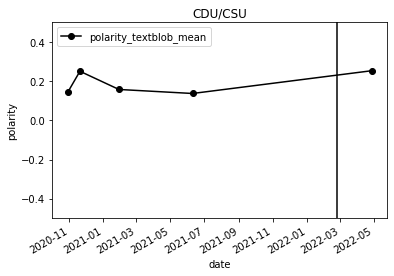

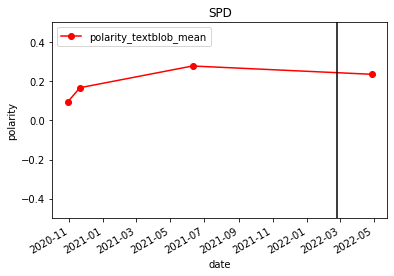

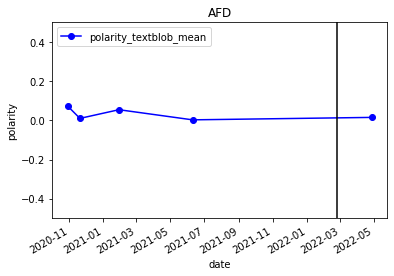

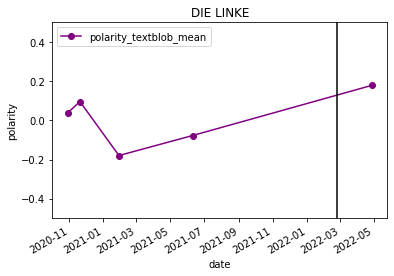

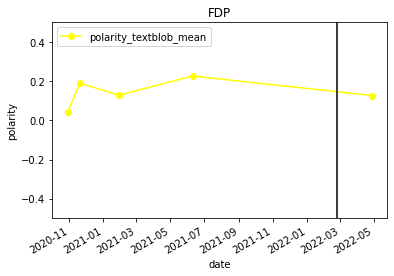

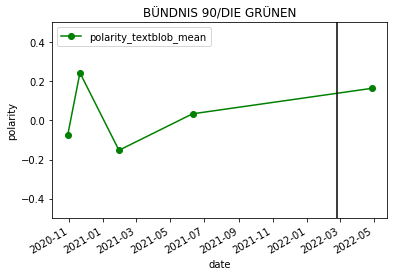

In [13]:
#values y scale
ymin = -0.50
ymax = 0.50

#plot the textblob polarity values from the parties in realtion to Waffenlieferung
for party in PARTEI_OBJEKT:

    df_waff_grouped_txtblb = df_waff_grouped.loc[df_waff_grouped.partei.apply(lambda par: party['partei'] in par)]
    df_waff_grouped_txtblb.plot(kind='line',x='datum',y=["polarity_textblob_mean"],color=party['color'], marker='o')
    plt.axvline(x = "2022-02-24", color = "black", label = "Kriegbeginn in der Ukraine") 
    ax = plt.gca()
    ax.set_ylim([ymin, ymax])

    plt.title(party["partei"])
    plt.xlabel('date')
    plt.ylabel('polarity')
    plt.show()

# Vader

### Übersetzung

In [20]:
#translate text to english because vader is only working properly in english language
from deep_translator import GoogleTranslator
import nltk

#translate text to english language
def translate_en(text):
    translated = GoogleTranslator(source='auto', target='en').translate(text)
    return translated


def translate_speech(text):
    # PROBLEM: translation is limited TO 5000 characters!!!
    # split text after 4999 characaters, translate both path separatly and join them afterwards
    sentences = nltk.sent_tokenize(text)  # this gives us a list of sentences

    all_paragraphs = [""]
    paragraph_index = 0

    for sentence in sentences:
        if len(all_paragraphs[paragraph_index]) > 4500:
            all_paragraphs[paragraph_index] += sentence
        else:
            paragraph_index += 1
            all_paragraphs.append("")
            all_paragraphs[paragraph_index] += sentence

    translated_text = ""

    for paragraph in all_paragraphs:
        translated_text += translate_en(paragraph)

    return translated_text

# PROBLEM: translation is limited TO 5000 characters!!!
df_waff["translated_speech"] = df_waff.parallel_apply(lambda row: translate_speech(row["rede"]), axis=1)

In [427]:
df_waff

,tagesordnungspunkt,partei,rede,kategorie,datum,thema,polarity_textblob,translated_speech
2476,Tagesordnungspunkt 31,AFD,Sehr geehrte Frau Präsidentin! Meine Damen und...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.054286,Dear Madam President!Ladies and gentlemen!This...
2477,Tagesordnungspunkt 31,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",-0.152857,Dear Madam President!Dear Colleagues!Weapons o...
2478,Tagesordnungspunkt 31,CDU/CSU,Frau Präsidentin! Meine sehr verehrten Damen u...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.134619,Madam President!Ladies and gentlemen!Dear coll...
2479,Tagesordnungspunkt 31,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kollegen ...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.180750,Dear Madam President!Dear colleagues!Today we ...
2480,Tagesordnungspunkt 31,DIE LINKE,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",-0.179630,Madam President!Dear Colleagues!Turkey is thre...
2481,Tagesordnungspunkt 31,FDP,Leibhaftig! – Sehr geehrte Frau Präsidentin! M...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.128604,incarnate!– Dear Madam President!Ladies and ge...
3278,Tagesordnungspunkt 25,AFD,Sehr geehrter Herr Präsident! Sehr geehrte Dam...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",0.002564,Dear Mr President!Dear Sir or Madam!It is inte...
3279,Tagesordnungspunkt 25,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",0.033333,Dear Mr President!Dear Colleagues!First of all...
3280,Tagesordnungspunkt 25,CDU/CSU,Herr Präsident! Hohes Haus! Deutschland ist ni...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",0.137167,Mister President!High house!Germany is not the...
3281,Tagesordnungspunkt 25,DIE LINKE,Herr Präsident! Meine Damen und Herren! Vier J...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",-0.077632,Mister President!Ladies and gentlemen!For four...


In [21]:
# compute the vader polarity score for each translated speech

def get_polarity_vader(input_speech):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(input_speech)
    return sentiment_dict["compound"]
    
df_waff["polarity_vader"] = df_waff.apply(lambda row: get_polarity_vader(row["translated_speech"]), axis=1)

df_waff

,tagesordnungspunkt,partei,rede,kategorie,datum,thema,polarity_textblob,translated_speech,polarity_vader
2476,Tagesordnungspunkt 31,AFD,Sehr geehrte Frau Präsidentin! Meine Damen und...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.054286,Dear Madam President!Ladies and gentlemen!This...,0.9917
2477,Tagesordnungspunkt 31,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",-0.152857,Dear Madam President!Dear Colleagues!Weapons o...,-0.9906
2478,Tagesordnungspunkt 31,CDU/CSU,Frau Präsidentin! Meine sehr verehrten Damen u...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.134619,Madam President!Ladies and gentlemen!Dear coll...,0.9928
2479,Tagesordnungspunkt 31,CDU/CSU,Sehr geehrte Frau Präsidentin! Liebe Kollegen ...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.180750,Dear Madam President!Dear colleagues!Today we ...,0.9949
2480,Tagesordnungspunkt 31,DIE LINKE,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",-0.179630,Madam President!Dear Colleagues!Turkey is thre...,-0.9970
2481,Tagesordnungspunkt 31,FDP,Leibhaftig! – Sehr geehrte Frau Präsidentin! M...,Waffenlieferung,2021-01-29,"a) Antrag der Abgeordneten Katja Keul, Margare...",0.128604,incarnate!– Dear Madam President!Ladies and ge...,0.9973
3278,Tagesordnungspunkt 25,AFD,Sehr geehrter Herr Präsident! Sehr geehrte Dam...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",0.002564,Dear Mr President!Dear Sir or Madam!It is inte...,0.8582
3279,Tagesordnungspunkt 25,BÜNDNIS 90/DIE GRÜNEN,Sehr geehrter Herr Präsident! Liebe Kolleginne...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",0.033333,Dear Mr President!Dear Colleagues!First of all...,0.9555
3280,Tagesordnungspunkt 25,CDU/CSU,Herr Präsident! Hohes Haus! Deutschland ist ni...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",0.137167,Mister President!High house!Germany is not the...,0.9868
3281,Tagesordnungspunkt 25,DIE LINKE,Herr Präsident! Meine Damen und Herren! Vier J...,Waffenlieferung,2021-06-10,"a) Antrag der Abgeordneten Sevim Dağdelen, Hei...",-0.077632,Mister President!Ladies and gentlemen!For four...,0.8719


In [22]:
# group dataframe by datum and partei and get the avg polarity value for this every party at every specific date
df_waff_grouped_txtblb_vdr = df_waff.groupby(["datum", "partei"]).agg({'polarity_textblob': 'mean', 'polarity_vader': 'mean'})
df_waff_grouped_txtblb_vdr = df_waff_grouped_txtblb_vdr.add_suffix('_mean').reset_index()

df_waff_grouped_txtblb_vdr

,datum,partei,polarity_textblob_mean,polarity_vader_mean
0,2020-10-29,AFD,0.072841,0.872850
1,2020-10-29,BÜNDNIS 90/DIE GRÜNEN,-0.076423,-0.969900
2,2020-10-29,CDU/CSU,0.142740,0.353150
3,2020-10-29,DIE LINKE,0.037879,-0.982900
4,2020-10-29,FDP,0.042788,-0.982600
5,2020-10-29,SPD,0.093783,-0.196867
6,2020-11-20,AFD,0.010000,0.891200
7,2020-11-20,BÜNDNIS 90/DIE GRÜNEN,0.242857,0.962300
8,2020-11-20,CDU/CSU,0.250593,0.989067
9,2020-11-20,DIE LINKE,0.095833,0.837200


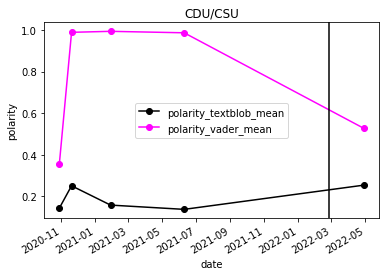

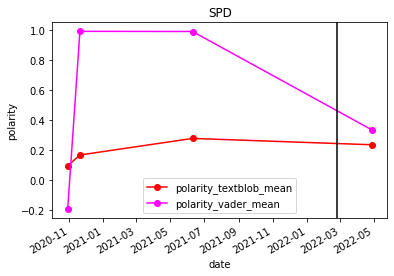

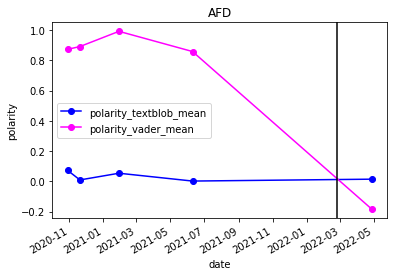

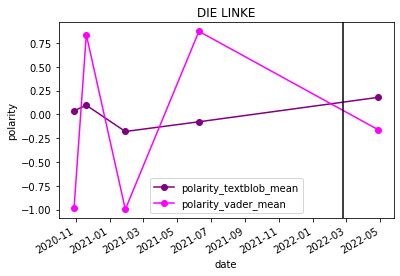

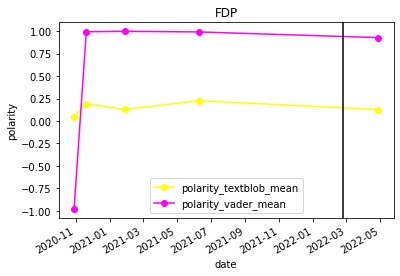

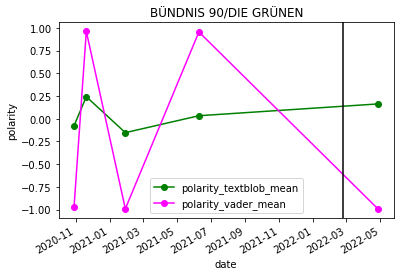

In [23]:
# change range of scala, because vader values are likely to be close to 1 or -1
ymin=-1.50
ymax=1.50

#plot the textblob polarity values from the parties in relation to Waffenlieferung
for party in PARTEI_OBJEKT:

    df_waff_grouped_txtblb_vdr_plot = df_waff_grouped_txtblb_vdr.loc[df_waff_grouped_txtblb_vdr.partei.apply(lambda par: party['partei'] in par)]
    df_waff_grouped_txtblb_vdr_plot.plot(kind='line',x='datum',y=["polarity_textblob_mean", "polarity_vader_mean"],color=[party['color'], "magenta"], marker='o')
    plt.axvline(x = "2022-02-24", color = "black", label = "Kriegbeginn in der Ukraine") 
    ax.set_ylim([ymin, ymax])

    plt.title(party["partei"])
    plt.xlabel('date')
    plt.ylabel('polarity')
    plt.show()